#### PB1 Abhishek Wahane

### Case Study 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
import datetime
import requests
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
py.init_notebook_mode(connected=True)
#from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [2]:
ageGroup = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
covid19India = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
hospitalBeds = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
icmrTestDetails = pd.read_csv('../input/covid19-in-india/ICMRTestingDetails.csv')
icmrTestLabs = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')
indiDetails = pd.read_csv('../input/covid19-in-india/IndividualDetails.csv')
indiaCencus = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')
stateDetails = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')

### Age Group Analysis

Most Number of cases have occured in the age group **20-50**

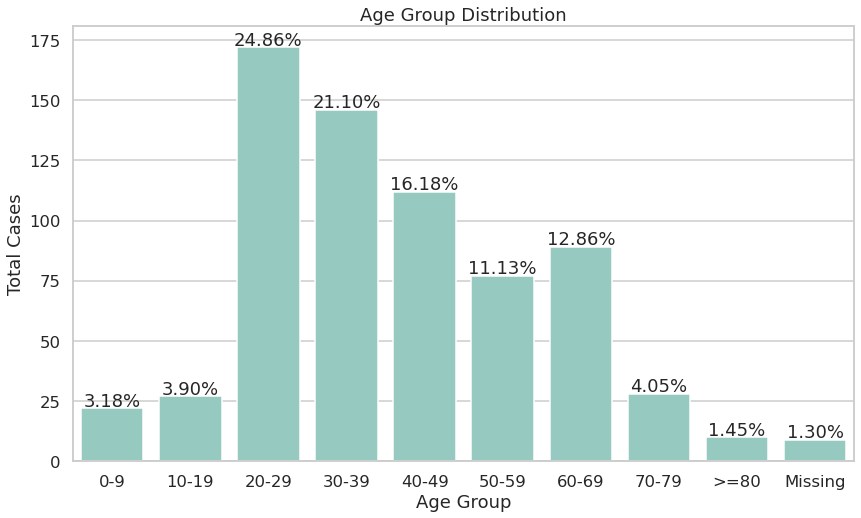

In [3]:
plt.figure(figsize=(14,8))
sns.barplot(data=ageGroup,x='AgeGroup',y='TotalCases',color=sns.color_palette('Set3')[0])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
for i in range(ageGroup.shape[0]):
    count = ageGroup.iloc[i]['TotalCases']
    plt.text(i,count+1,ageGroup.iloc[i]['Percentage'],ha='center')
    
from IPython.display import display, Markdown
display(Markdown("Most Number of cases have occured in the age group **20-50**"))

### Gender wise Analysis

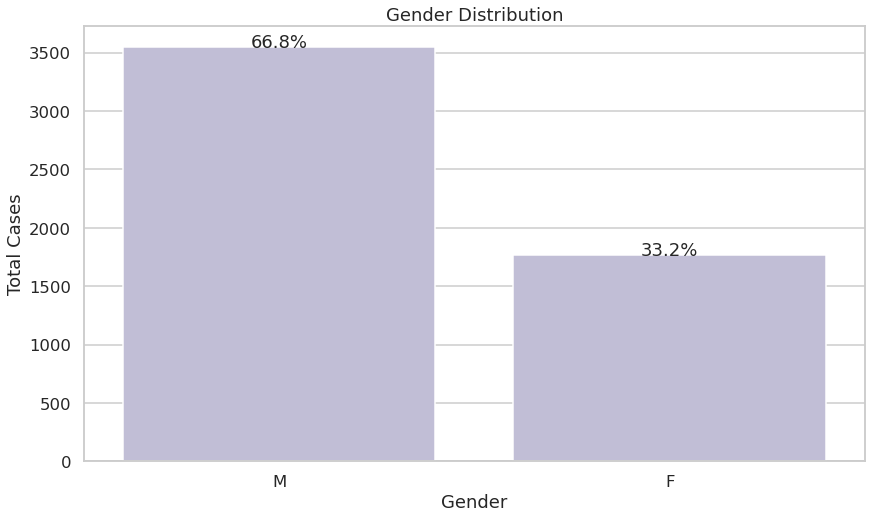

In [4]:
plt.figure(figsize=(14,8))
sns.countplot(data=indiDetails,x='gender',order=indiDetails['gender'].value_counts().index,color=sns.color_palette('Set3')[2])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Cases')
order2 = indiDetails['gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / indiDetails.gender.dropna().count() )
    plt.text(i,count+2,strt,ha='center')

### Cases in India

In [6]:
covid19India['Date'] = pd.to_datetime(covid19India['Date'],dayfirst=True)
covid19India.at[1431,'Deaths']=119
covid19India.at[1431,'State/UnionTerritory']='Madhya Pradesh'
covid19India['Deaths']=covid19India['Deaths'].astype(int)
df1=covid19India.groupby('Date').sum()
df1.reset_index(inplace=True)

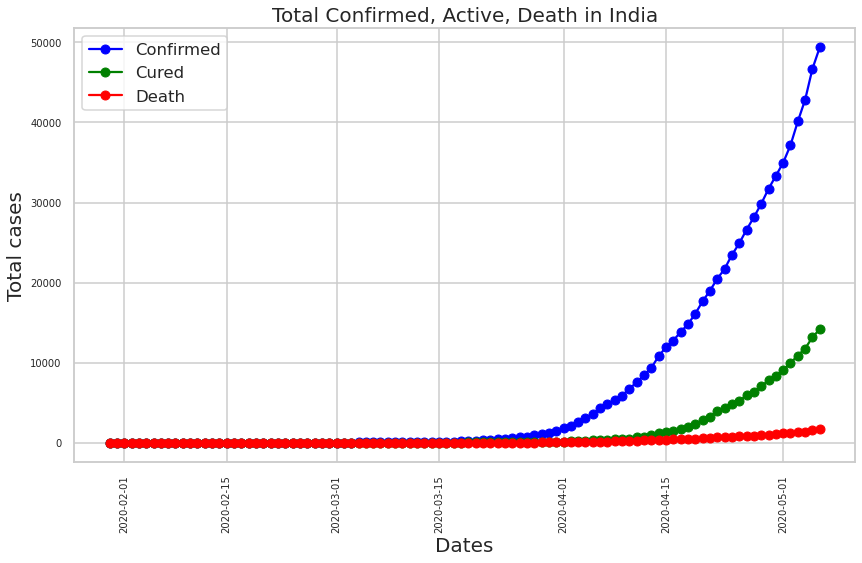

In [7]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df1,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df1,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend();

### Testing

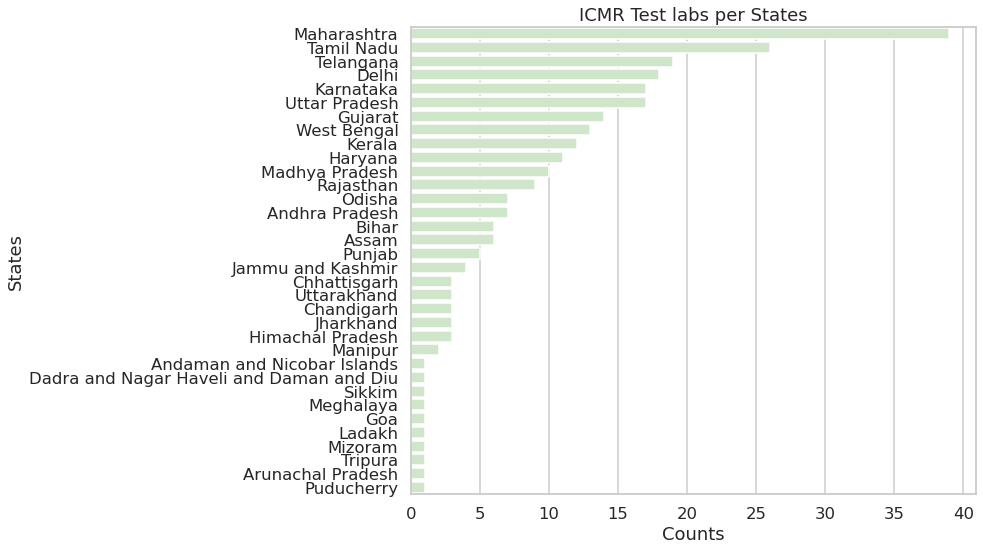

In [22]:
state=list(icmrTestLabs['state'].value_counts().index)
count=list(icmrTestLabs['state'].value_counts())
plt.figure(figsize=(14,8))
sns.barplot(x=count,y=state,color=sns.color_palette('Set3')[10])
plt.xlabel('Counts')
plt.ylabel('States')
plt.title('ICMR Test labs per States')
plt.tight_layout()